 # ---------------Problem Definition-------------- ##
 
This notebook is prepared to analyze the feedback given by customers of a company and identify the key improvement areas. We analyze the sentiment of different demographics as well as measure the performance of different branch of retailer at different time dimension. 

# ------------- Exploratory  Data Analysis------------------ #

In [1]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

## Load the data ##

In [2]:
df_loaded=pd.read_excel("Bluemountain.xls")

In [3]:
df_loaded['Shop Date'].unique()

array(['2014-10-02T11:00:00', '2014-10-02T17:00:00',
       '2014-10-02T13:00:00', '2014-10-02T09:00:00',
       '2014-10-02T18:00:00', '2014-10-02T16:00:00',
       '2014-10-02T10:00:00', '2014-10-02T08:00:00',
       '2014-10-02T14:00:00', '2014-10-02T15:00:00',
       '2014-10-02T12:00:00'], dtype=object)

In [4]:
df_loaded['Id'].unique()

array([   0,    2,    3, ..., 4247, 4249, 4250])

In [5]:
df_loaded.describe(include='all')

,Id,Name,Href,_ExternalId,Receipt No,Customer No,Shop Date,Store,NPS Label,NPS Score,...,Gender,Price,Availability,Service,Information,Requested Callback,Time Of Day,Region,Division,Comment Tags
count,3212.000000,3212,0.0,3212.000000,3212.000000,3.212000e+03,3212,3212,3212,3212.000000,...,3212,3212,3212,3212,3212,3212,3212,3212,3212,2926
unique,NaN,3,NaN,NaN,NaN,NaN,11,261,3,NaN,...,2,3,3,3,3,2,11,4,4,1857
top,NaN,Neutral,NaN,NaN,NaN,NaN,2014-10-02T10:00:00,Chadstone,Neutral,NaN,...,Female,Worse,Worse,Worse,Worse,No,10am,Region 2,Apparel,Price
freq,NaN,1899,NaN,NaN,NaN,NaN,326,56,1899,NaN,...,1615,1859,1779,1855,1836,1613,326,818,827,46
mean,2100.769303,NaN,NaN,7768.525841,50549.420299,5.114535e+06,NaN,NaN,NaN,7.547634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1228.711205,NaN,NaN,4111.825070,28367.984870,2.913550e+06,NaN,NaN,NaN,1.221334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,3.000000,1010.000000,1.019760e+05,NaN,NaN,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1019.750000,NaN,NaN,4722.000000,25987.750000,2.568726e+06,NaN,NaN,NaN,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2081.500000,NaN,NaN,8012.000000,50039.500000,5.109123e+06,NaN,NaN,NaN,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3171.250000,NaN,NaN,11072.500000,74933.750000,7.639817e+06,NaN,NaN,NaN,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean and Prepare data for analysis ##

In [6]:
df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           3212 non-null   int64  
 1   Name                         3212 non-null   object 
 2   Href                         0 non-null      float64
 3   _ExternalId                  3212 non-null   int64  
 4   Receipt No                   3212 non-null   int64  
 5   Customer No                  3212 non-null   int64  
 6   Shop Date                    3212 non-null   object 
 7   Store                        3212 non-null   object 
 8   NPS Label                    3212 non-null   object 
 9   NPS Score                    3212 non-null   int64  
 10  Likelihood To Shop Again     3212 non-null   int64  
 11  Customer Satisfaction Score  3212 non-null   int64  
 12  Category                     3212 non-null   object 
 13  Question          

In [7]:
# dropping unncessesary columns
df_cleaned=df_loaded.drop(columns=['Id','Href','_ExternalId','Receipt No','Customer No'])
#keeping column names more consistent
df_cleaned.columns=[ *map(lambda x: x.lower().replace(' ','_'),df_cleaned.columns)]
#removing dollar symbol from total_spend
df_cleaned.total_spend=df_cleaned.total_spend.str.replace('$','').astype(float)

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         3212 non-null   object 
 1   shop_date                    3212 non-null   object 
 2   store                        3212 non-null   object 
 3   nps_label                    3212 non-null   object 
 4   nps_score                    3212 non-null   int64  
 5   likelihood_to_shop_again     3212 non-null   int64  
 6   customer_satisfaction_score  3212 non-null   int64  
 7   category                     3212 non-null   object 
 8   question                     3212 non-null   object 
 9   comment                      3208 non-null   object 
 10  total_spend                  3212 non-null   float64
 11  age                          3212 non-null   int64  
 12  age_group                    3212 non-null   object 
 13  gender            

In [9]:
#let's find out sentiment value from comment
sentiment_polarity=[]
for comment in df_cleaned.comment:
    x=TextBlob(str(comment))
    sentiment_polarity.append(round(x.polarity,1))

In [10]:
df_cleaned.insert(23, "sentiment_polarity", sentiment_polarity, True) 

In [11]:
print(df_cleaned.comment[10]+'\n\n'+ str(df_cleaned.sentiment_polarity[10]))

no particular reason. items wanted were in stock and 3 for 2 childrens clothing discount applied to similarly priced items rather than just the cheapest of all of them thankfully.

-0.0


### ------ Demographic of Customers--------- ###

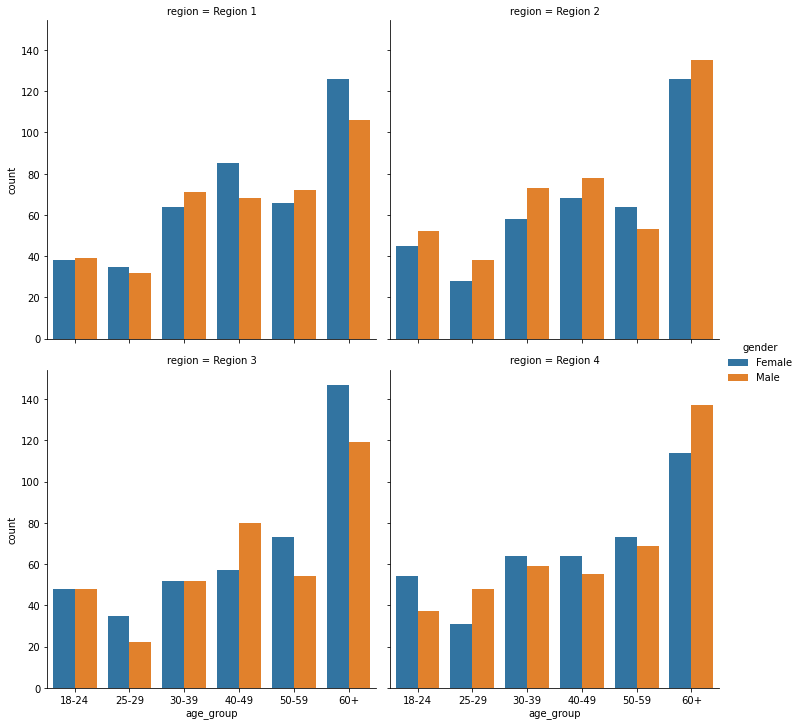

In [12]:
age_order=['18-24','25-29','30-39','40-49','50-59','60+']
region_order=['Region 1','Region 2','Region 3','Region 4']
sns.catplot(x='age_group',hue='gender',col='region',col_wrap=2,data=df_cleaned,order=age_order,kind='count',col_order=region_order)
plt.savefig('demographic.png',bbox_inches='tight')

In [13]:
def encode_label(df,cat_col):
    cat_dic={}
    cats=df[cat_col].cat.categories.tolist()
    for cat in cats:
        cat_dic[cat]=df[df[cat_col]==cat]['total_spend'].mean()
    df[cat_col]=df[cat_col].map(cat_dic)

In [14]:
#this function plots heatmap to show correlation among different variables
def visual_correlation(df,num_col,cat_col,target_var):
    for column in cat_col:
        df[column]=df[column].astype("category")
        encode_label(df,column)
        df[column]=pd.to_numeric(df[column])

    fig=plt.figure(figsize=(12,7))
    sns.heatmap(df[num_col+cat_col+[target_var]].corr(),cmap='Greens',annot=True)
    plt.savefig('corr_matrix.png',bbox_inches='tight')
    plt.xticks(rotation=45)

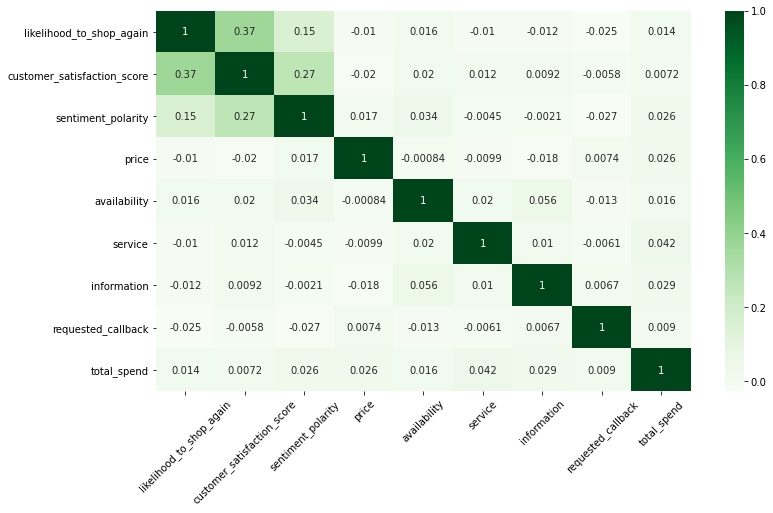

In [15]:
#see correlation of different measures
df_measures=df_cleaned[['likelihood_to_shop_again','customer_satisfaction_score','sentiment_polarity','total_spend','price']]
categorical_column=['price','availability','service','information','requested_callback']
numerical_column=['likelihood_to_shop_again','customer_satisfaction_score','sentiment_polarity']
target_variable='total_spend'
visual_correlation(df_cleaned,numerical_column,categorical_column,target_variable)

### Relationship of customer sentiment polarity with customer satisfaction score ###

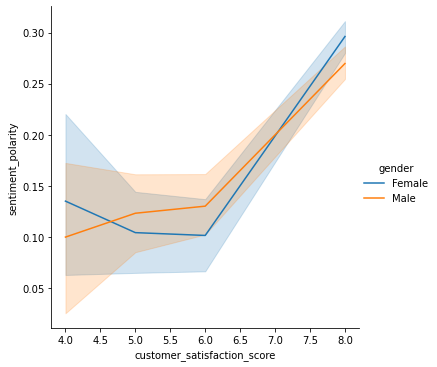

In [16]:
#sns.catplot(data=df_cleaned,x='time_of_day',y='sentiment_polarity',row='store',kind='box')
sns.relplot(x='customer_satisfaction_score',y='sentiment_polarity',hue='gender',data=df_cleaned,kind='line')
plt.savefig('comment_satisfaction_relation.png',bbox_inches='tight')

**We can see that increasing value of customer satisfaction score does not have much effect on sentiment polarity  before customer satisfaction score reaches to 6.But after satisfaction score of 6,increasing score value means more positive sentiment.**

### --------Bad Customer Experience ( Which Store?)  -------- ###

In [17]:
# total number of stores in feedback data

stores=len(df_cleaned['store'].value_counts())
store_list=df_cleaned['store'].value_counts()
print("total number of stores"+":"+str(stores))
store_list[0:10]

total number of stores:261


Chadstone        56
Morley           45
Brisbane CBD     43
North Lakes      42
Edwardstown      41
Rockingham       40
Chatswood        39
Southland        36
Melbourne CBD    35
Bullcreek        35
Name: store, dtype: int64

In [18]:
# find the stores satsfying bad customer experience
worse_condition1=(df_cleaned['customer_satisfaction_score']<6)& (df_cleaned['likelihood_to_shop_again']<6)
worse_condition2=(df_cleaned['service']=='Worse')&(df_cleaned['availability']=='Worse')
category_condition=(df_cleaned['category']=='In-store Shopping Improvement Comments')|(df_cleaned['category']=='Satisfaction Comments')
df_worse_experience=df_cleaned[(worse_condition1 & worse_condition2)]
df_worse_store=df_cleaned[(worse_condition1 & worse_condition2)& (category_condition)]
worse_store=len(df_worse_store.store.value_counts())
print('Total number of worst experiences found in record are:\n')
print(len(df_worse_experience))
print("\nTotal number of worst stores"+":"+str(worse_store))
print("\nThe worst stores are:\n")
df_worse_store.store.unique()

Total number of worst experiences found in record are:

0

Total number of worst stores:0

The worst stores are:



array([], dtype=object)

### ----------------Bad Customer Experience(Which region and division ?)---------- ####

In [19]:
#plt.title('Number of comments and their category for bad customer experience ')
sns.catplot(x='region',kind='count',hue='division',data=df_worse_experience).set(title='Where did worst experience happen?')
plt.xticks(rotation='30')
plt.savefig('where_bad_experience.png',bbox_inches='tight')
plt.show()

ValueError: min() arg is an empty sequence

**We can see that Region 1,2,3 neeed to specially focus on 'other' division, while Region 4 needs to focus more on 'House' division.**

### ----------Bad Customer Experience (What time ?)---------- ###

In [ ]:
time_order=['8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm']
sns.catplot(x='time_of_day',kind='count',data=df_worse_experience,order=time_order).set(title='What time did worst experience happen?')
plt.xticks(rotation='30')
plt.savefig('time_bad_experience.png',bbox_inches='tight')
plt.show()

**Although bad experiences are not felt on some specific time, it can be seen it's recorded more between 9am-11am and 5 pm.**

### -------- Good Customer Experience (which stores)-------- ###

In [ ]:
# Find the stores satisfying good customer experience
good_condition1=(df_cleaned['customer_satisfaction_score']>6)& (df_cleaned['likelihood_to_shop_again']>6)
good_condition2=(df_cleaned['service']=='Better')&(df_cleaned['availability']=='Better')
good_condition3=df_cleaned['sentiment_polarity']>=0
category_condition=(df_cleaned['category']=='In-store Shopping Improvement Comments')|(df_cleaned['category']=='Satisfaction Comments')
df_good_experience=df_cleaned[(good_condition1 & good_condition2)& good_condition3]
df_good_store=df_cleaned[(good_condition1 & good_condition2)& (good_condition3 & category_condition)]
good_store=len(df_good_store.store.value_counts())
print('Total number of the good experiences found are:')
print(len(df_good_experience))
print("\nTotal number of good stores"+" :"+ str(good_store))
print("\nThe good stores are:\n")
df_good_store.store.unique()

### ---------------Good Customer Experience(which region and divison)----------- #####

In [ ]:
sns.catplot(x='region',kind='count',hue='division',data=df_good_experience).set(title='Where did good experience happen?')
plt.xticks(rotation='30')
plt.savefig('where_good_experience.png',bbox_inches='tight')
plt.show()

**Most of the customers recording good shopping experiences did shopping in 'Apparel' and 'Other' division of different regions.**

### ----------- Good Customer Experience(What time?)------- ###

In [ ]:
time_order=['8am','9am','10am','11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm']
sns.catplot(x='time_of_day',kind='count',data=df_good_experience,order=time_order).set(title='What time did good experience happen?')
plt.xticks(rotation='30')
plt.savefig('time_good_experience.png',bbox_inches='tight')
plt.show()

**We can see that most of the customers who had good experiences shop at 9am and 1-2pm.**

###  -------- Bad Experience (price and quality)--------- ###

In [ ]:
bad_condition=(df_cleaned.price=='Worse')& (df_cleaned.category=='Product Quality Comments')&(df_cleaned.sentiment_polarity<0)
worse_price_quality=df_cleaned[bad_condition]
sns.catplot(x='age_group',data=worse_price_quality,hue='division',kind='count',order=age_order).set(title='Bad price and quality feedback')
plt.savefig('price_quality_problem.png',bbox_inches='tight')

**From figure above it is clear that customers aged above 60 have bad experience of price and quality mostly in 'other'and 'baby' division.Young people seem unhappy with quality and price of 'Apparel' and 'Other' division of items more than other division of items. It needs special attention.**

### --------Store List (Only Bad Experience)----- ###

In [ ]:
#is there any stores where only bad experience is recorded ?

set_common=set(df_worse_experience.store).intersection(set(df_good_experience.store))
set_bad_only_store=set(df_worse_experience.store).difference(set_common)
print(list(set_bad_only_store))


### ------Store List (Only Good Experience)----- ###

In [ ]:
#is there any stores where only good experience is recorded?
set_good_only_store=set(df_good_experience.store).difference(set_common)
print('These are stores where only good experience is recorded\n')
print(list(set_good_only_store))

In [ ]:
#relationship between age and sentiment polarity
#df_cleaned.total_spend.astype(float)
sns.catplot(x='age_group',y='sentiment_polarity',hue='gender',data=df_cleaned,kind='box')

### Let's find those negative comments from customer having bad experience ###

In [ ]:
def word_count_comment_tag(myseries):
    all_tags=[]
    comment_tags=list((myseries))
    for every_tag in comment_tags:
        all_tags.extend(list(str(every_tag).split(',')))
    
    all_tags.remove(' ')
#all_tags

    comments_count={}
    for comments in all_tags:
        comments=str(comments).lower().strip()
        if comments in comments_count:
            comments_count[comments]+=1
        else:
            comments_count[comments]=1
    sorted_comment=dict(sorted(comments_count.items(), key=lambda item: item[1],reverse=True))
    del sorted_comment['nan']
    del sorted_comment['']
    print(sorted_comment)

word_count_comment_tag(df_worse_experience['comment_tags'])

**From above list of most frequent comment tags, we can see most of the comments tags consists of words such as choice, range, store management and staff, Apparel, product, stock, time, quallity, checkout and cleanliness.**

**We can also have a look at real comment which is described below:**

In [ ]:
pd.set_option("display.max_colwidth", None)
df_worse_experience[df_worse_experience.sentiment_polarity<-0.0]['comment']

### --------------- What words are most frequently used by people with good experience?--------- ####

In [ ]:
word_count_comment_tag(df_good_experience['comment_tags'])

**Customers with good experience frequently used the words staff, services,range of products, size, choice, apparel,cleanliness, quality, checkout and time** 

### Recommendations:

Stores in which customers reported only worst experiences need immediate attention.From above comments we can derive some major issues that has caused bad customer experiences and should be addressed first starting from  worst stores.Major recommendations are listed below:

* Need to check and organize the stocks properly and fill the empty products as soon as possible
* Need to monitor the products quality and cleanliness
* Customer service needs to improve, queue should not be long
* We can see that Region 1,2,3 neeed to specially focus on 'other' division, while Region 4 needs to focus more on 'House' division.
* Althoug bad experiences are not felt on some specific time, it can be seen it's recorded more between 9am-11am and 5 pm


* **Immediate attention should be given to following list of stores for improvements:**

    **'Dalby', 'Tweed Heads', 'Liverpool', 'Bairnsdale', 'Warrnambool', 'The Willows', 'Belconnen', 'Mareeba', 'Watergardens', 'Rhodes', 'Robina', 'Victor Harbor', 'Midland', 'Fountain Gate', 'Rouse Hill', 'Southport', 'Gladstone', 'Maroochydore', 'Eastgardens', 'Kalgoorlie', 'Gympie', 'Benalla', 'Capalaba', 'Blacktown', 'Cannot find store', 'Forest Hill', 'Roselands'**

    
          
           